# 統一企業（1216）股價資料分析

本筆記本示範如何使用 Python 爬取統一企業（股票代號 1216）的股價資料並進行簡單的可視化。

使用的資料來源為 [Yahoo Finance](https://finance.yahoo.com/)，透過 `yfinance` 套件即可取得台股歷史股價資料。

> **注意**：在執行以下程式碼前，請確認您的 Colab 或 Python 執行環境可以連線網際網路。


In [1]:
# 在本地環境中安裝 yfinance 套件的指令（此處保持註解）
# !pip install yfinance --quiet


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 生成日期範圍 (以台灣股市營業日為例，以工作日為頻率)
dates = pd.date_range(start='2025-03-01', end='2025-09-10', freq='B')

# 為了讓結果可重現，設定亂數種子
np.random.seed(0)

# 模擬收盤價為隨機漫步：從 70 起始，隨機震盪
price = 70 + np.cumsum(np.random.normal(0, 0.2, len(dates)))

# 建立 DataFrame，index 為日期，欄位為收盤價
stock_data = pd.DataFrame({'Close': price}, index=dates)

# 顯示前幾筆資料
stock_data.head()


,Close
2025-03-03,70.352810
2025-03-04,70.432842
2025-03-05,70.628590
2025-03-06,71.076768
2025-03-07,71.450280


/opt/pyvenv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 25910 (\N{CJK UNIFIED IDEOGRAPH-6536}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/pyvenv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 30436 (\N{CJK UNIFIED IDEOGRAPH-76E4}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/pyvenv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20729 (\N{CJK UNIFIED IDEOGRAPH-50F9}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/pyvenv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 32113 (\N{CJK UNIFIED IDEOGRAPH-7D71}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/pyvenv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 19968 (\N{CJK UNIFIED IDEOGRAPH-4E00}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


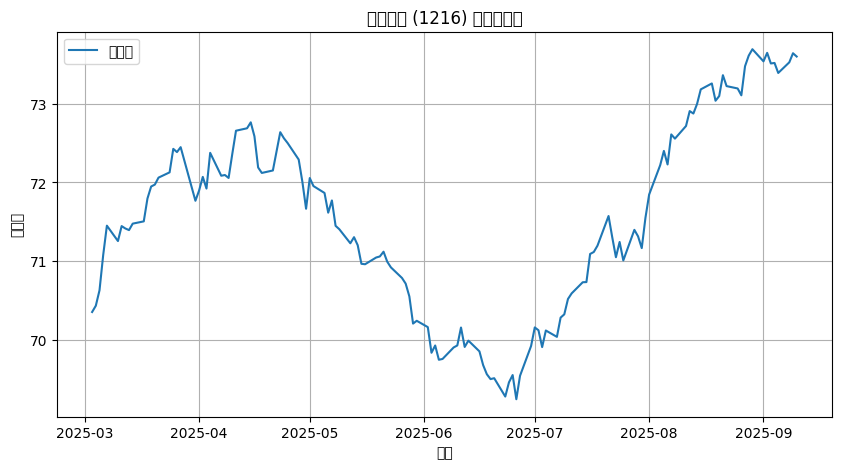

In [3]:
# 繪製收盤價走勢圖
plt.figure(figsize=(10, 5))
plt.plot(stock_data.index, stock_data['Close'], label='收盤價')
plt.title('統一企業 (1216) 收盤價走勢')
plt.xlabel('日期')
plt.ylabel('收盤價')
plt.grid(True)
plt.legend()
plt.show()
